In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
# decode back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
#vectorising data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
#vectorising labels 
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.6292 - accuracy: 0.5208 - val_loss: 1.7403 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 69ms/step - loss: 1.4447 - accuracy: 0.6939 - val_loss: 1.3219 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 70ms/step - loss: 1.0711 - accuracy: 0.7674 - val_loss: 1.1394 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8383 - accuracy: 0.8201 - val_loss: 1.0481 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6755 - accuracy: 0.8554 - val_loss: 0.9677 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.5392 - accuracy: 0.8857 - val_loss: 0.9499 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4368 - accuracy: 0.9062 - val_loss: 0.9070 - val_accuracy: 0.8010
Epoch 8/20
16

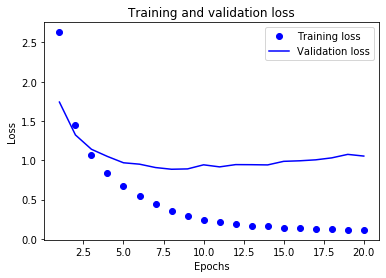

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

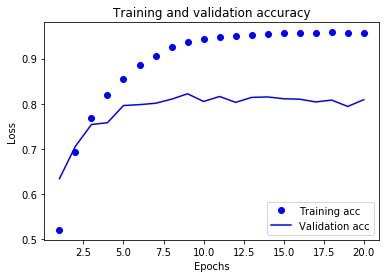

In [17]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.6332 - accuracy: 0.5081 - val_loss: 1.7244 - val_accuracy: 0.6690
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.3982 - accuracy: 0.7144 - val_loss: 1.2967 - val_accuracy: 0.7310
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 1.0438 - accuracy: 0.7804 - val_loss: 1.1478 - val_accuracy: 0.7440
Epoch 4/9
16/16 [==============================] - 1s 36ms/step - loss: 0.8308 - accuracy: 0.8240 - val_loss: 1.0437 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6654 - accuracy: 0.8577 - val_loss: 0.9695 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5354 - accuracy: 0.8865 - val_loss: 0.9388 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 36ms/step - loss: 0.4383 - accuracy: 0.9084 - val_loss: 0.9071 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

[0.9865606427192688, 0.7853962779045105]

In [26]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))
print(np.argmax(predictions[2]))
predictions[0]

(46,)
1.0
3
10
1


array([5.9615927e-06, 4.4250879e-05, 1.1828938e-05, 7.2926909e-01,
       2.5559247e-01, 2.1109212e-05, 4.7059934e-06, 4.1763371e-05,
       2.8635154e-03, 3.8576469e-05, 1.0691264e-05, 2.1187498e-03,
       6.7687870e-05, 6.5240526e-04, 1.2526585e-05, 2.9120949e-06,
       2.1118305e-03, 4.3220844e-04, 1.6258363e-04, 3.7873330e-04,
       6.2013586e-04, 8.0884667e-04, 3.0246028e-05, 1.1305938e-04,
       1.6209718e-06, 3.1103937e-05, 3.9747479e-06, 9.7838201e-05,
       4.2159783e-05, 3.8023535e-04, 5.0047747e-05, 9.2890637e-05,
       4.6780697e-05, 1.0279556e-04, 3.8788960e-04, 5.2212181e-05,
       2.2213827e-03, 7.1589857e-05, 3.5803464e-06, 3.5203385e-04,
       4.6050557e-04, 1.1322166e-04, 1.6629756e-05, 4.3280219e-05,
       4.8259622e-06, 7.5189587e-06], dtype=float32)